In [7]:
# 1 - Classificação com Regressão Logística

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd

iris = load_iris()
X = iris.data
y = iris.target 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[10,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  7]], dtype=int64)

In [8]:
# 2 - Classificação com K-Nearest Neighbors (KNN)

import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, f1_score

wine_data = load_wine()
X = wine_data.data
y = wine_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify=y)

knn = KNeighborsClassifier()

param_grid = {'n_neighbors': np.arange(1, 31)}
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1_macro')

grid_search.fit(X_train, y_train)

best_k = grid_search.best_params_['n_neighbors']
print(f"Melhor nº de vizinhos: {best_k}")

knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

y_pred = knn_best.predict(X_test)

f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1-Score: {f1}")

print("\nRelatório de classificação:")
print(classification_report(y_test, y_pred, target_names=wine_data.target_names))

Melhor nº de vizinhos: 5
F1-Score: 0.582716049382716

Relatório de classificação:
              precision    recall  f1-score   support

     class_0       0.73      0.92      0.81        12
     class_1       0.62      0.71      0.67        14
     class_2       0.40      0.20      0.27        10

    accuracy                           0.64        36
   macro avg       0.59      0.61      0.58        36
weighted avg       0.60      0.64      0.60        36



In [9]:
# 3 - Classificação com Support Vector Machines (SVM)

import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, precision_score, recall_score

cancer_data = load_breast_cancer()
X = cancer_data.data
y = cancer_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify=y)

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")

print("\nRelatório de classificação:")
print(classification_report(y_test, y_pred, target_names=cancer_data.target_names))

Precision: 0.9452054794520548
Recall: 0.9583333333333334

Relatório de classificação:
              precision    recall  f1-score   support

   malignant       0.93      0.90      0.92        42
      benign       0.95      0.96      0.95        72

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



In [29]:
# 4 - Classificação com Árvores de Decisão

# Importar bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder

import seaborn as sns
titanic = sns.load_dataset('titanic')

titanic = titanic.drop(['deck', 'embark_town', 'alive'], axis=1)

titanic['age'] = titanic['age'].fillna(titanic['age'].mean())
titanic['embarked'] = titanic['embarked'].fillna(titanic['embarked'].mode()[0])

label_encoder = LabelEncoder()
for column in ['sex', 'embarked', 'class', 'who', 'adult_male', 'alone']:
    titanic[column] = label_encoder.fit_transform(titanic[column])

X = titanic.drop('survived', axis=1)
y = titanic['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify=y)

tree_model = DecisionTreeClassifier(random_state=10)
tree_model.fit(X_train, y_train)

y_pred_proba = tree_model.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {roc_auc}")

ROC-AUC Score: 0.7673433362753752


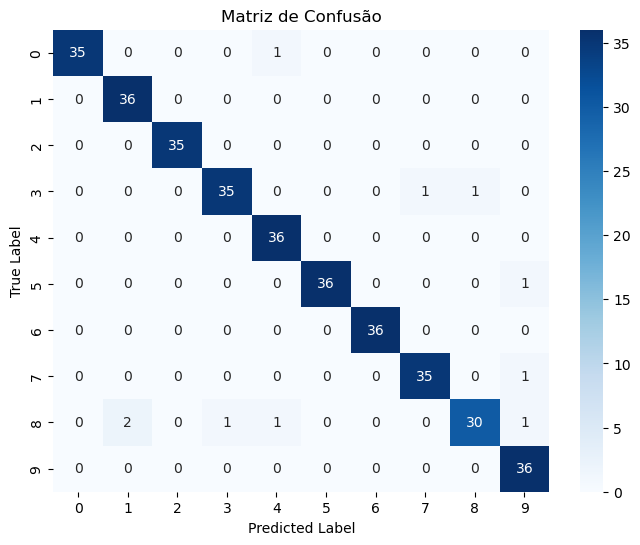

F1-Score (média macro): 0.9718380049668877

Relatório de classificação:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.95      1.00      0.97        36
           2       1.00      1.00      1.00        35
           3       0.97      0.95      0.96        37
           4       0.95      1.00      0.97        36
           5       1.00      0.97      0.99        37
           6       1.00      1.00      1.00        36
           7       0.97      0.97      0.97        36
           8       0.97      0.86      0.91        35
           9       0.92      1.00      0.96        36

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



In [31]:
# 5 - Classificação com Random Forest

import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

digits = load_digits()
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify=y)

rf_model = RandomForestClassifier(random_state=10)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.title('Matriz de Confusão')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1-Score (média macro): {f1}")

print("\nRelatório de classificação:")
print(classification_report(y_test, y_pred, target_names=[str(i) for i in digits.target_names]))

ROC-AUC Score: 0.9963624338624338


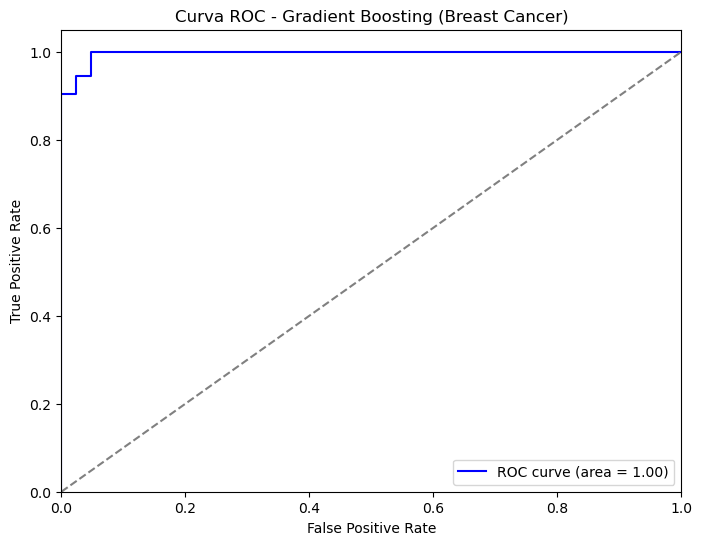

In [33]:
# 6 - Classificação com Gradient Boosting

import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

cancer_data = load_breast_cancer()
X = cancer_data.data
y = cancer_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify=y)

gb_model = GradientBoostingClassifier(random_state=10)
gb_model.fit(X_train, y_train)

y_pred_proba = gb_model.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {roc_auc}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Gradient Boosting (Breast Cancer)')
plt.legend(loc="lower right")
plt.show()

Precision (weighted): 1.0


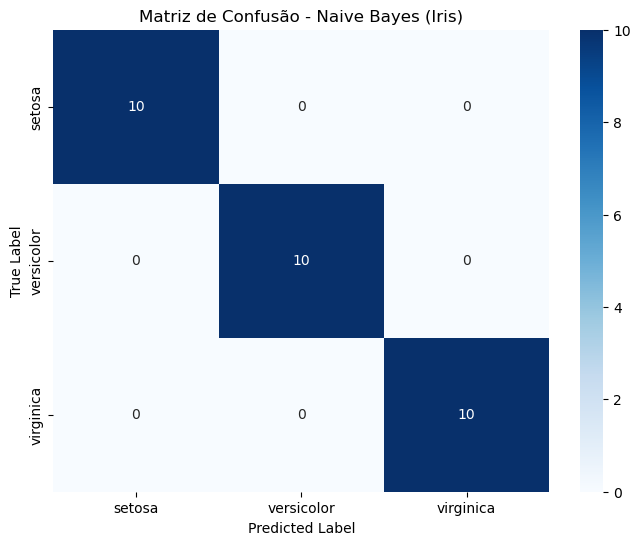


Relatório de classificação:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [35]:
# 7 - Classificação Multiclasse com Naive Bayes

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify=y)

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

weighted_precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision (weighted): {weighted_precision}")

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Matriz de Confusão - Naive Bayes (Iris)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print("\nRelatório de classificação:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
R² Score: 0.4584649934303069
Mean Absolute Error (MAE): 4.314224104076755


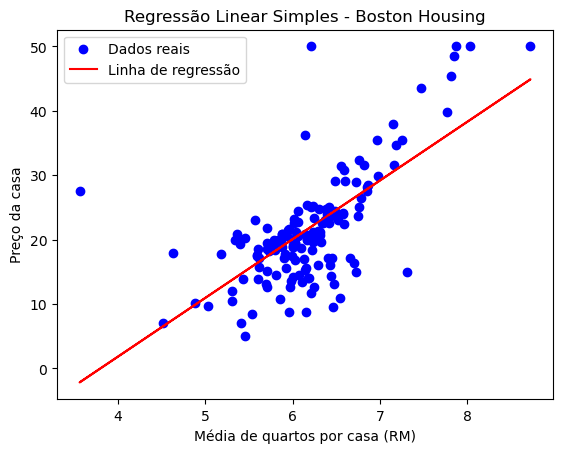

In [9]:
# 8 - Regressão Linear Simples

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt

df = pd.read_csv('boston_housing.csv')

print(df.head())

X = df[['rm']]
y = df['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R² Score: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")

plt.scatter(X_test, y_test, color='blue', label='Dados reais')
plt.plot(X_test, y_pred, color='red', label='Linha de regressão')
plt.xlabel('Média de quartos por casa (RM)')
plt.ylabel('Preço da casa')
plt.title('Regressão Linear Simples - Boston Housing')
plt.legend()
plt.show()


In [1]:
# 9 - Regressão Linear Múltipla

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data = {
    'temperatura': [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
    'umidade': [30, 35, 33, 36, 37, 32, 31, 34, 38, 37, 39],
    'velocidade_vento': [5, 7, 6, 8, 7, 9, 5, 6, 7, 6, 8],
    'pressao': [1012, 1011, 1010, 1009, 1008, 1013, 1012, 1011, 1009, 1010, 1007],
    'consumo_energia': [300, 320, 310, 330, 340, 350, 360, 370, 380, 390, 400]
}

df = pd.DataFrame(data)

X = df[['temperatura', 'umidade', 'velocidade_vento', 'pressao']]
y = df['consumo_energia']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2}")
print(f"Mean Squared Error (MSE): {mse}")


R² Score: 0.9579385885774334
Mean Squared Error (MSE): 36.45322323289104


In [ ]:
# 10 - Regressão com KNN

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df = pd.read_csv('AirfoilSelfNoise.csv')

X = df[['Frequency', 'Angle of attack', 'Chord length', 'Free-stream velocity', 
         'Suction side displacement thickness']]
y = df['Scaled Sound Pressure Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred_linear = linear_model.predict(X_test)

mse_knn = mean_squared_error(y_test, y_pred_knn)
mse_linear = mean_squared_error(y_test, y_pred_linear)

print(f"MSE - KNN: {mse_knn}")
print(f"MSE - Regressão Linear: {mse_linear}")

In [5]:
# 11 - Regressão com Support Vector Regression (SVR)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error

df = pd.read_csv('boston_housing.csv')

X = df.drop(columns='medv')
y = df['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

y_pred = svr_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")


Mean Absolute Error (MAE): 6.521687139582814
Mean Squared Error (MSE): 105.48010272748091


In [29]:
# 12 - Regressão com Árvores de Decisão

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error

df = pd.read_csv('bikeshare.csv')

if 'datetime' in df.columns:
    df['datetime'] = pd.to_datetime(df['datetime'])
    df['year'] = df['datetime'].dt.year
    df['month'] = df['datetime'].dt.month
    df['day'] = df['datetime'].dt.day
    df['hour'] = df['datetime'].dt.hour
    df = df.drop(columns='datetime') 

X = df.drop(columns='count') 
y = df['count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

tree_model = DecisionTreeRegressor(random_state=10)
tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R² Score: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")



R² Score: 0.9989537487016644
Mean Absolute Error (MAE): 3.000918273645546


In [ ]:
# 13 - Regressão com Random Forest

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('car_price.csv')

print(df.head())

X = df.drop(columns='valor')  
y = df['valor'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

rf_model = RandomForestRegressor(random_state=10)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred_linear = linear_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Random Forest - MSE: {mse_rf}, R²: {r2_rf}")
print(f"Regressão Linear - MSE: {mse_linear}, R²: {r2_linear}")

In [ ]:
# 14 - Clusterização com K-Means
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

iris = load_iris()
X = iris.data

kmeans = KMeans(n_clusters=2, random_state=10)  # 3 espécies
kmeans.fit(X)

# Obter as previsões
labels = kmeans.labels_

inertia = kmeans.inertia_
silhouette_avg = silhouette_score(X, labels)

print(f"Inércia dos clusters: {inertia}")
print(f"Coeficiente de Silhueta: {silhouette_avg}")

Coeficiente de Silhueta: 0.7936904660226303


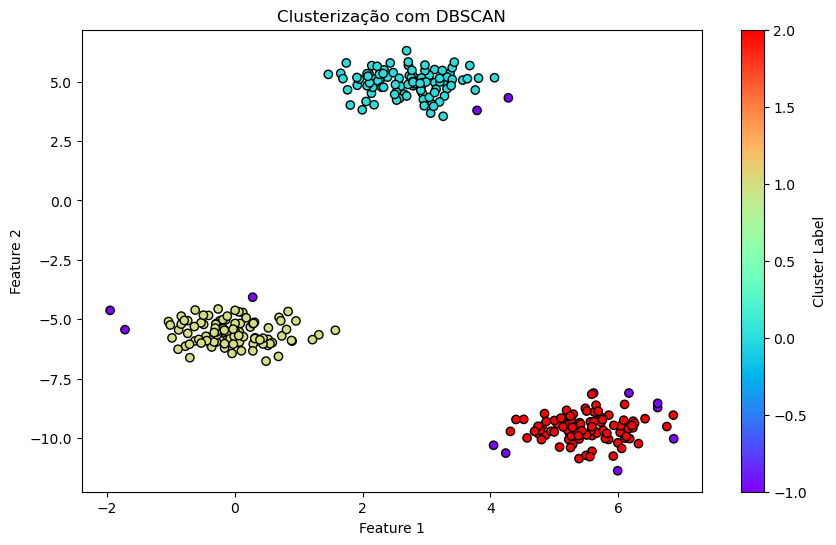

In [11]:
# 15 - Clusterização com DBSCAN

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=10)

dbscan = DBSCAN(eps=0.5, min_samples=5)  
labels = dbscan.fit_predict(X)

if len(set(labels)) > 1:  
    silhouette_avg = silhouette_score(X, labels)
    print(f"Coeficiente de Silhueta: {silhouette_avg}")
else:
    print("Não foram formados clusters suficientes para calcular o coeficiente de silhueta.")

# Visualizar os clusters
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow', marker='o', edgecolor='k')
plt.title('Clusterização com DBSCAN')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()